In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Titanic = pd.read_csv("Titanic.csv")

In [3]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Titanic.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis=1,inplace = True)

In [5]:
Titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
Titanic.isnull().sum(axis=0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
# 对Sex分组，用各组乘客的平均年龄填充各组中的缺失年龄
Titanic.fillna(value = {'Age':Titanic.Age.mean()},inplace = True)
# 使用Embarked变量的众数填充缺失值
Titanic.fillna(value = {'Embarked':Titanic.Embarked.mode()[0]}, inplace=True)

In [8]:
Titanic.isnull().sum(axis=0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

把sex，Embarked这两个分裂变量转换成数值型变量

In [9]:
Titanic.replace('male',1,inplace=True)
Titanic.replace('female',0,inplace=True)

In [10]:
#亚变量处理
dummy = pd.get_dummies(Titanic[['Embarked']])
#水平合并Titanic数据集和哑变量的数据集
Titanic = pd.concat([Titanic,dummy],axis=1)
#删除原始的Embarked变量
Titanic.drop(['Embarked'],inplace=True,axis=1)

In [11]:
Titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


数据预处理完之后开始准备做逻辑回归

In [12]:
predictors = Titanic.columns[1:]
predictors

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [13]:
#构建自变量矩阵
X = Titanic.loc[:,predictors]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0
2,3,0,26.000000,0,0,7.9250,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,1
4,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1
887,1,0,19.000000,0,0,30.0000,0,0,1
888,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [14]:
y = Titanic.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
#拆分数据集
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25,random_state = 1234)

In [17]:
#利用训练集建模
from sklearn import linear_model
sklearn_logistic = linear_model.LogisticRegression()
sklearn_logistic.fit(X_train,y_train)

D:\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#返回模型的参数
beta = sklearn_logistic.intercept_,sklearn_logistic.coef_
print(beta)

(array([3.62760797]), array([[-0.99611714, -2.50648887, -0.04075034, -0.42207151, -0.01547175,
         0.00575394,  1.05821547,  1.06893593,  0.78693404]]))


Xβ = 3.63 - 0.10Pclass - 2.51Sex - 0.04Age - 0.42SibSp -0.02Parch +0.01Fare +1.06Embarked_C+1.07Embarked_Q+0.79Embarked_S

In [19]:
sklearn_predict = sklearn_logistic.predict(X_test)

In [20]:
pd.Series(sklearn_predict).value_counts()

0    146
1     77
dtype: int64

## 模型评估

In [21]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,sklearn_predict,labels=[0,1])
cm

array([[119,  13],
       [ 27,  64]], dtype=int64)

In [22]:
Accuracy = metrics.accuracy_score(y_test,sklearn_predict)
Sensitivity = metrics.recall_score(y_test,sklearn_predict)
Specificity = metrics.recall_score(y_test,sklearn_predict,pos_label=0)
print('模型准确率为:%.2f%%'%(Accuracy*100))
print('正例覆盖率为:%.2f%%'%(Sensitivity*100))
print('负例覆盖率为:%.2f%%'%(Specificity*100))

模型准确率为:82.06%
正例覆盖率为:70.33%
负例覆盖率为:90.15%


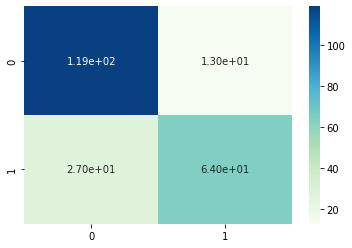

In [23]:
sns.heatmap(cm,annot=True,fmt='.2e',cmap='GnBu')
plt.show()

In [24]:
y_score = sklearn_logistic.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)
roc_auc = metrics.auc(fpr,tpr)

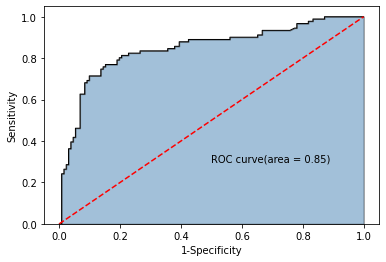

In [26]:
plt.stackplot(fpr,tpr,color = 'steelblue',alpha=0.5,edgecolor='black')
plt.plot(fpr,tpr,color='black',lw=1)
plt.plot([0,1],[0,1],color='red',linestyle = '--')
plt.text(0.5,0.3,'ROC curve(area = %0.2f)'%roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()